# Multiple Linear Regression - Prediction

L'objectif central de ce projet réside dans le développement d'un modèle de régression linéaire multiple, dédié à la prédiction précise des tarifs des taxis.

Le processus implique l'utilisation d'une approche de régression linéaire multiple, qui permet d'explorer la relation entre les tarifs des taxis et plusieurs variables explicatives simultanément. Les données collectées seront soigneusement examinées, mettant en lumière des facteurs potentiels tels que la distance parcourue, le temps de la journée, la période de l'année, ou d'autres caractéristiques pertinentes pouvant influencer les tarifs des taxis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
from datetime import timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
data = pd.read_csv('Taxi_Trip_Data.csv')
data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [3]:
df = data.copy()

In [4]:
df.shape

(22699, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [6]:
data.duplicated().sum()

0

Il n'y a pas de doublons ni de valeurs manquantes dans les données.

In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,22699.000,56758486.171,32744929.492,12127.000,28520556.000,56731504.000,85374524.000,113486300.000
VendorID,22699.000,1.556,0.497,1.000,1.000,2.000,2.000,2.000
passenger_count,22699.000,1.642,1.285,0.000,1.000,1.000,2.000,6.000
trip_distance,22699.000,2.913,3.653,0.000,0.990,1.610,3.060,33.960
RatecodeID,22699.000,1.043,0.708,1.000,1.000,1.000,1.000,99.000
PULocationID,22699.000,162.412,66.633,1.000,114.000,162.000,233.000,265.000
DOLocationID,22699.000,161.528,70.140,1.000,112.000,162.000,233.000,265.000
payment_type,22699.000,1.337,0.496,1.000,1.000,1.000,2.000,4.000
fare_amount,22699.000,13.027,13.244,-120.000,6.500,9.500,14.500,999.990
extra,22699.000,0.333,0.463,-1.000,0.000,0.000,0.500,4.500


il y a clairement des valeurs aberrantes dans plusieurs variables, comme tip_amount (200) et total_amount (1,200). En outre, un certain nombre de variables, telles que mta_tax, semblent être presque constantes dans l'ensemble des données, ce qui impliquerait qu'elles ne devraient pas être très prédictives.

### Convertir les colonnes 'tpep_pickup_datetime' et 'tpep_dropoff_datetime' en date.

In [8]:
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime, format='%m/%d/%Y %I:%M:%S %p')
df.tpep_dropoff_datetime[0]

Timestamp('2017-03-25 09:09:47')

In [9]:
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime, format='%m/%d/%Y %I:%M:%S %p')
df.tpep_pickup_datetime[0]

Timestamp('2017-03-25 08:55:43')

### Créer la colonne 'Duration'

Créer une nouvelle colonne appelée 'Duration' qui représente le nombre total de minutes qu'a duré chaque course de taxi.

In [10]:
df['Duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

### Outliers

Nombreuses caractéristiques ne seront pas utilisées pour ajuster le modèle, les colonnes les plus importantes à vérifier pour les valeurs aberrantes sont probablement les suivantes :

* `trip_distance`
* `fare_amount`
* `duration`

#### Box Plot

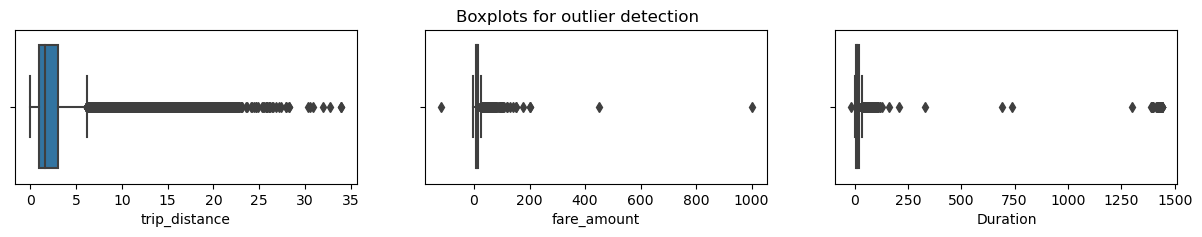

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['Duration'])
plt.show();

Les trois variables contiennent des valeurs aberrantes. Certaines sont extrêmes, d'autres le sont moins.

In [12]:
df['fare_amount'].describe()

count   22699.000
mean       13.027
std        13.244
min      -120.000
25%         6.500
50%         9.500
75%        14.500
max       999.990
Name: fare_amount, dtype: float64

La plage de valeurs dans la colonne `fare_amount` est large et les extrêmes n'ont pas beaucoup de sens.

Les valeurs négatives posent problème. Des valeurs de zéro peuvent être légitimes si le taxi a enregistré une course qui a été immédiatement annulée.

**Valeurs élevées:** Le montant maximum de la course dans cet ensemble de données est de près de 1 000, ce qui semble très improbable. Les valeurs élevées de cette caractéristique peuvent être plafonnées sur la base de l'intuition et des statistiques. L'intervalle interquartile (IQR) est de 8. La formule standard `Q3 + (1,5 * IQR)` donne 26,50. Cela ne semble pas approprié pour le plafond du tarif maximum. Dans ce cas, j'utilise un facteur de `6`, ce qui donne un plafond de 62,50.

**Examiner les valeurs nulles**

In [13]:
df[df['fare_amount'] <= 0]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Duration
314,105454287,2,2017-12-13 02:02:39,2017-12-13 02:03:08,6,0.120,1,N,161,161,3,-2.500,-0.500,-0.500,0.000,0.000,-0.300,-3.800,0.483
1646,57337183,2,2017-07-05 11:02:23,2017-07-05 11:03:00,1,0.040,1,N,79,79,3,-2.500,0.000,-0.500,0.000,0.000,-0.300,-3.300,0.617
4402,108016954,2,2017-12-20 16:06:53,2017-12-20 16:47:50,1,7.060,1,N,263,169,2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,40.950
4423,97329905,2,2017-11-16 20:13:30,2017-11-16 20:14:50,2,0.060,1,N,237,237,4,-3.000,-0.500,-0.500,0.000,0.000,-0.300,-4.300,1.333
5448,28459983,2,2017-04-06 12:50:26,2017-04-06 12:52:39,1,0.250,1,N,90,68,3,-3.500,0.000,-0.500,0.000,0.000,-0.300,-4.300,2.217
5722,49670364,2,2017-06-12 12:08:55,2017-06-12 12:08:57,1,0.000,1,N,264,193,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.033
5758,833948,2,2017-01-03 20:15:23,2017-01-03 20:15:39,1,0.020,1,N,170,170,3,-2.500,-0.500,-0.500,0.000,0.000,-0.300,-3.800,0.267
8204,91187947,2,2017-10-28 20:39:36,2017-10-28 20:41:59,1,0.410,1,N,236,237,3,-3.500,-0.500,-0.500,0.000,0.000,-0.300,-4.800,2.383
10281,55302347,2,2017-06-05 17:34:25,2017-06-05 17:36:29,2,0.000,1,N,238,238,4,-2.500,-1.000,-0.500,0.000,0.000,-0.300,-4.300,2.067
10506,26005024,2,2017-03-30 03:14:26,2017-03-30 03:14:28,1,0.000,1,N,264,193,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.033


Presque toutes les courses avec de petites valeurs négatives pour 'fare_amount' semblesnt avoir une courte durée, ce qui suggère que les valeurs sont correctes,  sauf qu'il y a eu une erreur de saisie en ajoutant le signe négatif. Pour remédier à cela, je vais conserver ces valeurs et les convertir en valeurs positives.

In [14]:
df['fare_amount'] = df['fare_amount'].abs()
df['fare_amount'].describe()


count   22699.000
mean       13.041
std        13.230
min         0.000
25%         6.500
50%         9.500
75%        14.500
max       999.990
Name: fare_amount, dtype: float64

**Examiner les valeurs négatifs**

In [15]:
df[df.fare_amount==0]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Duration
4402,108016954,2,2017-12-20 16:06:53,2017-12-20 16:47:50,1,7.060,1,N,263,169,2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,40.950
5722,49670364,2,2017-06-12 12:08:55,2017-06-12 12:08:57,1,0.000,1,N,264,193,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.033
10506,26005024,2,2017-03-30 03:14:26,2017-03-30 03:14:28,1,0.000,1,N,264,193,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.033
19067,58713019,1,2017-07-10 14:40:09,2017-07-10 14:40:59,1,0.100,5,N,261,13,3,0.000,0.000,0.000,0.000,0.000,0.300,0.300,0.833
21842,31708083,1,2017-04-18 16:55:29,2017-04-18 18:29:44,2,20.400,5,N,264,264,3,0.000,0.000,0.000,0.000,12.500,0.300,12.800,94.250
22566,19022898,2,2017-03-07 02:24:47,2017-03-07 02:24:50,1,0.000,1,N,264,193,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.050


Sur les 6 courses ayant des valeurs 'fare_amount' nulles, 4 d'entre elles ont également une durée pratiquement nulle. Il est possible que ces courses correspondent à des demandes de taxi annulées par le client. Par conséquent, ces informations (lignes) peuvent être considérées comme inutiles, et je prévois de les supprimer. En ce qui concerne les 2 lignes restantes avec une durée plus longue, étant donné leur faible nombre, je vais également les exclure.

In [16]:
df = df[df['fare_amount'] != 0]
df['fare_amount'].describe()

count   22693.000
mean       13.044
std        13.230
min         0.010
25%         6.500
50%         9.500
75%        14.500
max       999.990
Name: fare_amount, dtype: float64

In [17]:
df[df.fare_amount<1]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Duration
4061,68377591,1,2017-08-12 20:49:29,2017-08-12 21:18:50,4,4.500,5,N,107,265,3,0.010,0.000,0.000,0.000,10.500,0.300,10.810,29.350
14283,37675840,1,2017-05-03 19:44:28,2017-05-03 19:44:38,1,0.000,5,N,146,146,3,0.010,0.000,0.000,0.000,0.000,0.300,0.310,0.167


In [18]:
df = df[df.fare_amount>1]
df['fare_amount'].describe()

count   22690.000
mean       13.046
std        13.230
min         2.500
25%         6.500
50%         9.500
75%        14.500
max       999.990
Name: fare_amount, dtype: float64

**Inspecter la relation entre 'Duration' et 'Fare_amount'**

(-10.0, 200.0)

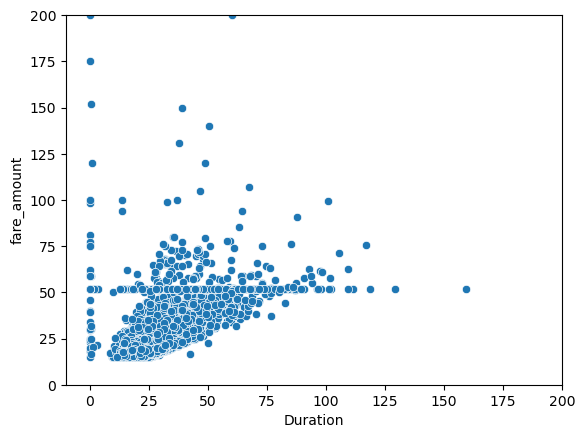

In [19]:
filtered_data = df[df['fare_amount'] > df['fare_amount'].quantile(0.75)]
sns.scatterplot(x=filtered_data['Duration'], y=filtered_data['fare_amount'])
plt.ylim(0, 200)
plt.xlim(-10, 200)

In [20]:
df[(df.fare_amount >14.500) & (df.Duration<1)]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Duration
128,52987734,1,2017-06-22 08:05:33,2017-06-22 08:05:40,1,0.000,3,N,231,231,2,20.000,0.000,0.000,0.000,0.000,0.300,20.300,0.117
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.230,2,N,132,132,2,52.000,0.000,0.500,0.000,0.000,0.300,52.800,0.967
470,103583013,2,2017-12-07 14:39:18,2017-12-07 14:39:23,1,0.000,5,N,138,138,1,34.000,0.000,0.500,6.960,0.000,0.300,41.760,0.083
572,61050418,2,2017-07-18 13:29:06,2017-07-18 13:29:19,1,0.000,2,N,230,161,1,52.000,0.000,0.500,11.710,5.760,0.300,70.270,0.217
1449,91160051,2,2017-10-28 19:41:58,2017-10-28 19:42:11,1,0.000,2,N,132,132,1,52.000,0.000,0.500,4.440,5.760,0.300,63.000,0.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20844,43635688,2,2017-05-21 21:42:23,2017-05-21 21:42:25,1,0.000,2,N,132,132,1,52.000,0.000,0.500,5.200,0.000,0.300,58.000,0.033
21315,18103885,1,2017-03-04 15:31:50,2017-03-04 15:31:54,1,0.900,2,N,132,132,1,52.000,0.000,0.500,10.550,0.000,0.300,63.350,0.067
21595,60959239,1,2017-07-18 07:48:17,2017-07-18 07:48:22,1,0.000,2,N,186,186,2,52.000,0.000,0.500,0.000,0.000,0.300,52.800,0.083
21836,65082578,2,2017-08-01 09:52:15,2017-08-01 09:52:15,3,0.000,5,N,264,143,1,59.000,0.000,0.000,9.000,0.000,0.000,68.000,0.000


Il y a 65 courses avec un tarif élevé et une durée pratiquement nulle, ce qui est incohérent. Par conséquent, je vais les supprimer.

In [21]:
df = df[~((df['fare_amount'] > 14.500) & (df['Duration']<1))]
df['fare_amount'].describe()

count   22625.000
mean       12.865
std        10.757
min         2.500
25%         6.500
50%         9.500
75%        14.500
max       200.010
Name: fare_amount, dtype: float64

**Inspecter la relation entre 'Distance' et 'Duration'**

<Axes: xlabel='trip_distance', ylabel='Duration'>

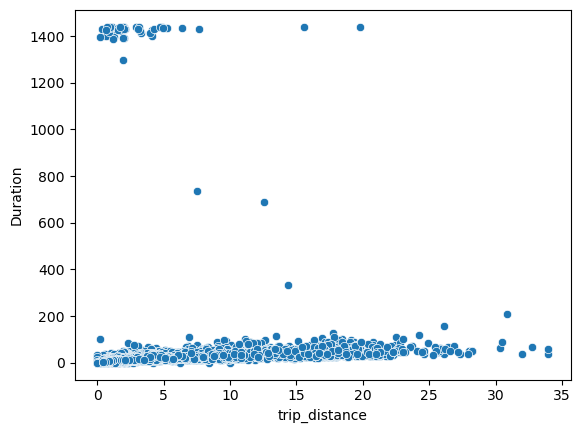

In [22]:
sns.scatterplot(x=df.trip_distance, y=df.Duration)


**Analyser les valeurs aberrantes**

In [23]:
df[df.Duration>200].reset_index()

,index,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Duration
0,29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.830,1,N,132,23,1,80.000,0.500,0.500,18.560,11.520,0.300,111.380,209.167
1,697,56236615,2,2017-06-10 21:55:01,2017-06-11 21:45:51,1,1.360,1,N,264,264,1,8.500,0.500,0.500,1.470,0.000,0.300,11.270,1430.833
2,924,9397494,2,2017-02-09 23:24:58,2017-02-10 23:24:31,5,4.860,1,N,249,238,1,17.500,0.500,0.500,0.000,0.000,0.300,18.800,1439.550
3,1010,103828457,2,2017-12-08 07:17:20,2017-12-09 07:07:22,1,0.330,1,N,161,161,2,4.500,0.000,0.500,0.000,0.000,0.300,5.300,1430.033
4,1199,96049166,2,2017-11-12 19:52:44,2017-11-13 19:37:35,1,4.140,1,N,186,236,1,18.000,0.000,0.500,3.760,0.000,0.300,22.560,1424.850
5,1355,31453899,2,2017-04-17 21:26:49,2017-04-18 20:46:13,6,4.090,1,N,100,13,2,15.000,0.500,0.500,0.000,0.000,0.300,16.300,1399.400
6,1758,110187757,2,2017-12-28 23:58:24,2017-12-29 23:38:45,1,1.230,1,N,163,50,1,7.000,0.500,0.500,1.660,0.000,0.300,9.960,1420.350
7,4600,107922016,2,2017-12-20 08:24:34,2017-12-21 07:39:27,4,1.260,1,N,140,236,2,10.000,0.000,0.500,0.000,0.000,0.300,10.800,1394.883
8,5051,66923363,2,2017-08-07 18:27:53,2017-08-08 00:00:00,1,14.350,1,N,132,33,1,50.500,1.000,0.500,10.460,0.000,0.300,62.760,332.117
9,5370,105699101,2,2017-12-13 19:40:05,2017-12-14 19:31:09,3,0.930,1,N,162,230,1,12.000,1.000,0.500,2.070,0.000,0.300,15.870,1431.067


Il y a 46 courses avec des durées élevées et des tarifs très bas, ce qui est incohérent. Par conséquent, je prévois de les supprimer.

In [24]:
df = df[df.Duration<200]


<Axes: xlabel='Duration', ylabel='fare_amount'>

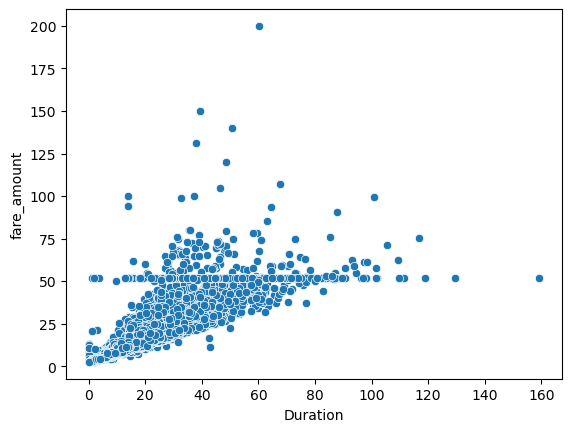

In [25]:
sns.scatterplot(x=df.Duration, y=df.fare_amount)

La variable 'Duration'e est en corrélation avec la variable cible. Mais il y a une ligne horizontale autour des montants de tarif de 52 dollars.

**Vérifier la valeur des trajets de la ligne horizontale du nuage de points.**

In [26]:
df[df.fare_amount==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Duration
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.900,2,N,236,132,1,52.000,0.000,0.500,14.580,5.540,0.300,72.920,36.800
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.000,2,N,132,163,1,52.000,0.000,0.500,0.000,0.000,0.300,52.800,66.850
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.930,2,N,132,79,2,52.000,0.000,0.500,0.000,0.000,0.300,52.800,29.183
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.990,2,N,132,234,1,52.000,0.000,0.500,14.640,5.760,0.300,73.200,29.483
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.400,2,N,132,48,2,52.000,4.500,0.500,0.000,5.540,0.300,62.840,39.833
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.730,2,N,228,88,2,52.000,0.000,0.500,0.000,5.760,0.300,58.560,15.617
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.210,2,N,132,48,2,52.000,0.000,0.500,0.000,5.760,0.300,58.560,45.450
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.270,2,N,186,132,2,52.000,0.000,0.500,0.000,5.760,0.300,58.560,42.850
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.340,2,N,132,148,1,52.000,0.000,0.500,5.000,0.000,0.300,57.800,71.583
569,99259872,2,2017-11-22 21:31:32,2017-11-22 22:00:25,1,18.650,2,N,132,144,1,52.000,0.000,0.500,10.560,0.000,0.300,63.360,28.883


Il semble que presque tous les trajets des 30 premières lignes pour lesquels le montant du tarif était de 52 dollars commencent ou se terminent à l'emplacement 132, et tous ont un RatecodeID de 2.

Il n'y a pas de raison évidente pour que PULocation 132 ait autant de tarifs de 52 dollars. Ils semblent se produire tous les jours, à des heures différentes, avec les deux vendeurs, tous les mois. Cependant, il y a beaucoup de péages de 5,76 dollars et de 5,54 dollars. Cela semble indiquer que l'emplacement 132 se trouve dans une zone où il faut fréquemment payer des péages pour y aller et en revenir.

In [26]:
df52 = df[df.fare_amount==52]

In [27]:
df = df[df.fare_amount != 52]

In [28]:
df.Duration.describe()

count   22094.000
mean       13.627
std        10.186
min         0.000
25%         6.600
50%        10.983
75%        17.717
max       116.833
Name: Duration, dtype: float64

In [29]:
df[df.Duration==0]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Duration
472,52474677,1,2017-06-20 18:57:39,2017-06-20 18:57:39,1,0.000,1,N,162,264,2,9.500,1.000,0.500,0.000,0.000,0.300,11.300,0.000
795,101135030,1,2017-11-30 07:11:34,2017-11-30 07:11:34,1,0.000,1,N,246,264,2,8.000,0.000,0.500,0.000,0.000,0.300,8.800,0.000
1205,112363821,1,2017-01-18 17:53:45,2017-01-18 17:53:45,1,0.000,1,N,264,264,2,2.500,1.000,0.500,0.000,0.000,0.300,4.300,0.000
2440,63574825,1,2017-07-26 22:26:58,2017-07-26 22:26:58,1,0.000,1,N,162,264,2,5.500,0.500,0.500,0.000,0.000,0.300,6.800,0.000
2740,42450170,1,2017-05-12 12:49:56,2017-05-12 12:49:56,1,0.000,1,Y,186,264,2,11.500,0.000,0.500,0.000,0.000,0.300,12.300,0.000
4171,12399699,1,2017-02-16 20:37:04,2017-02-16 20:37:04,1,0.000,1,N,238,264,2,9.500,0.500,0.500,0.000,0.000,0.300,10.800,0.000
8889,25813,1,2017-01-07 22:48:08,2017-01-07 22:48:08,1,0.000,1,N,229,264,2,2.500,0.500,0.500,0.000,0.000,0.300,3.800,0.000
9155,101666430,1,2017-12-01 18:41:19,2017-12-01 18:41:19,4,0.000,1,N,163,264,2,2.500,1.000,0.500,0.000,0.000,0.300,4.300,0.000
13062,85154968,1,2017-10-10 09:53:00,2017-10-10 09:53:00,1,0.000,1,N,186,264,2,2.500,0.000,0.500,0.000,0.000,0.300,3.300,0.000
14062,25713867,1,2017-03-30 19:56:31,2017-03-30 19:56:31,3,0.000,1,N,113,264,2,2.500,0.500,0.500,0.000,0.000,0.300,3.800,0.000


In [30]:
df = df[df.Duration>0]
df.Duration.describe()

count   22075.000
mean       13.638
std        10.183
min         0.017
25%         6.617
50%        11.000
75%        17.733
max       116.833
Name: Duration, dtype: float64

In [31]:
df[df.Duration<=1]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Duration
246,78660848,1,2017-09-18 20:50:53,2017-09-18 20:51:03,1,0.000,1,N,145,145,2,2.500,0.500,0.500,0.000,0.000,0.300,3.800,0.167
291,83480088,1,2017-10-04 19:46:24,2017-10-04 19:46:50,1,0.000,1,N,132,132,2,2.500,1.000,0.500,0.000,0.000,0.300,4.300,0.433
314,105454287,2,2017-12-13 02:02:39,2017-12-13 02:03:08,6,0.120,1,N,161,161,3,2.500,-0.500,-0.500,0.000,0.000,-0.300,-3.800,0.483
319,14024301,1,2017-02-22 04:01:44,2017-02-22 04:01:53,1,0.000,1,N,90,90,3,2.500,0.500,0.500,0.000,0.000,0.300,3.800,0.150
323,111191930,2,2017-01-14 19:04:51,2017-01-14 19:05:01,2,0.020,1,N,106,106,2,2.500,0.000,0.500,0.000,0.000,0.300,3.300,0.167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22190,87078850,1,2017-10-16 08:34:07,2017-10-16 08:34:10,1,0.000,1,N,132,132,3,2.500,0.000,0.500,0.000,0.000,0.300,3.300,0.050
22389,5274519,1,2017-01-26 18:06:06,2017-01-26 18:06:58,1,0.300,1,N,68,68,1,3.000,1.000,0.500,1.000,0.000,0.300,5.800,0.867
22523,34683663,2,2017-04-26 19:03:15,2017-04-26 19:03:38,2,0.080,1,N,142,142,1,2.500,1.000,0.500,1.290,0.000,0.300,5.590,0.383
22670,17852208,1,2017-03-03 23:09:16,2017-03-03 23:09:35,1,0.000,1,N,132,132,3,2.500,0.500,0.500,0.000,0.000,0.300,3.800,0.317


In [32]:
df[df.Duration<=1]['trip_distance'].value_counts().reset_index()

,trip_distance,count
0,0.000,56
1,0.020,9
2,0.100,8
3,0.010,3
4,0.140,3
5,0.370,3
6,0.040,3
7,0.070,3
8,0.300,3
9,0.200,3


In [33]:
df = df[df.Duration>1]
df.Duration.describe()

count   21949.000
mean       13.714
std        10.162
min         1.017
25%         6.683
50%        11.050
75%        17.800
max       116.833
Name: Duration, dtype: float64

In [34]:
df['trip_distance'].describe()

count   21949.000
mean        2.607
std         2.886
min         0.000
25%         1.000
50%         1.600
75%         2.900
max        33.960
Name: trip_distance, dtype: float64

D'après les statistiques descriptives, il apparaît que certaines distances de déplacement (trip_distance) sont égales à 0. Ces distances pourraient être le résultat de données erronées, ou il est possible qu'elles représentent des déplacements très courts qui ont été arrondis à l'unité inférieure.

Afin de vérifier cela, je vais procéder à la vérification suivante : trier les valeurs de la colonne, éliminer les doublons, puis examiner les 10 valeurs les plus faibles.

In [35]:
sorted(set(df['trip_distance']))[:10]

[0.0, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1, 0.11]

Les distances sont saisies avec une grande précision. Toutefois, il est possible que des trajets aient des distances nulles si un passager a appelé un taxi et a ensuite changé d'avis.

Calculer le nombre de trajets pour lesquels la distance du trajet (trip_distance) est égale à zéro.

In [36]:
sum(df['trip_distance']==0)

21

In [37]:
df = df[df['trip_distance'] >=0.1]

In [38]:
df.trip_distance.describe()

count   21918.000
mean        2.611
std         2.886
min         0.100
25%         1.000
50%         1.600
75%         2.900
max        33.960
Name: trip_distance, dtype: float64

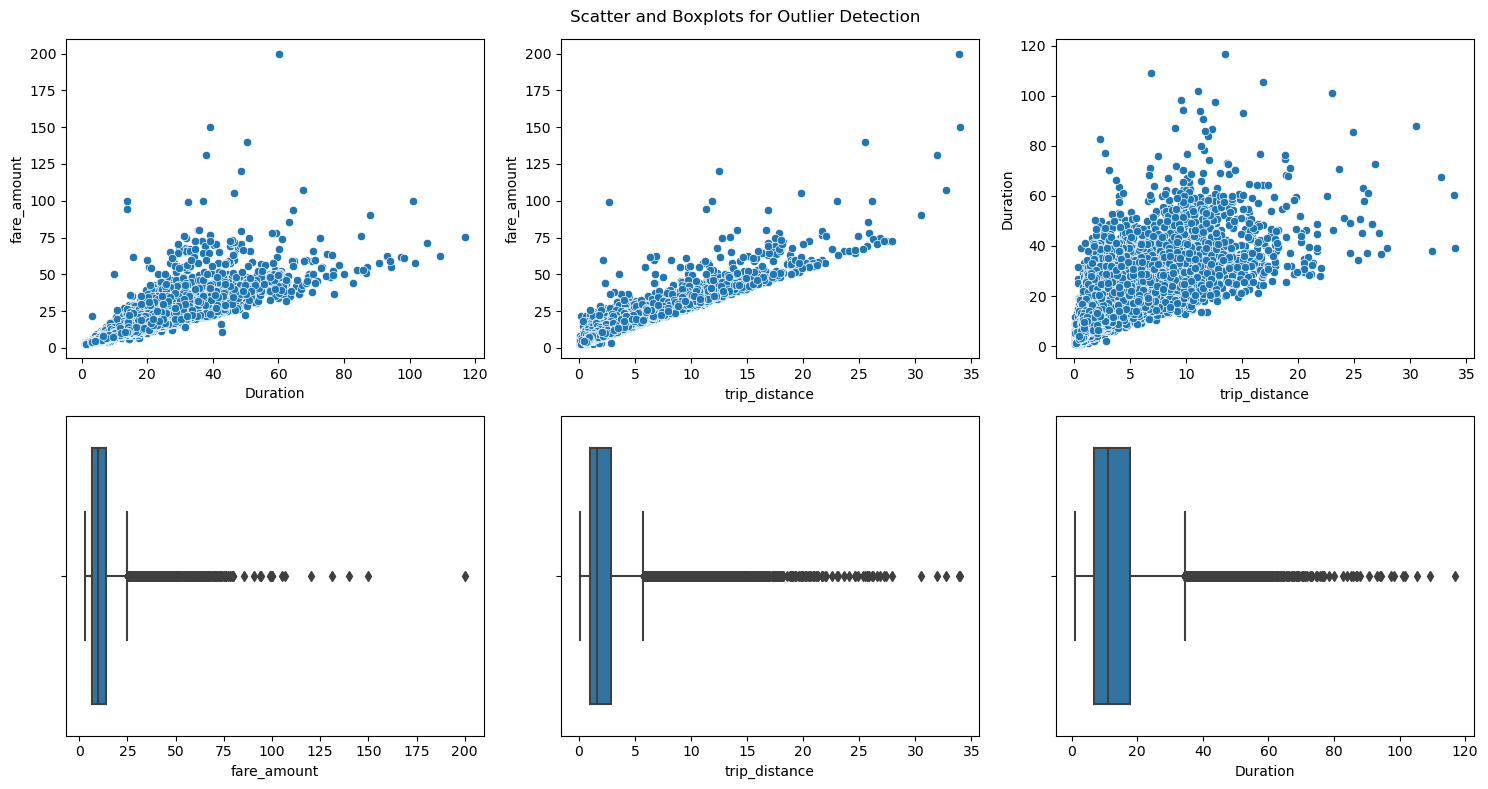

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Scatter and Boxplots for Outlier Detection')

sns.scatterplot(ax=axes[0, 0], x=df['Duration'], y=df['fare_amount'])
sns.scatterplot(ax=axes[0, 1], x=df['trip_distance'], y=df['fare_amount'])
sns.scatterplot(ax=axes[0, 2], x=df['trip_distance'], y=df['Duration'])

sns.boxplot(ax=axes[1, 0], x=df['fare_amount'])
sns.boxplot(ax=axes[1, 1], x=df['trip_distance'])
sns.boxplot(ax=axes[1, 2], x=df['Duration'])

plt.tight_layout()
plt.show()


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_outliers_iqr(dataframe, x_column, y_column):

    x_data = dataframe[x_column]
    y_data = dataframe[y_column]

    y_Q1, y_Q3 = y_data.quantile(0.25), y_data.quantile(0.75)
    y_IQR = y_Q3 - y_Q1

    y_lower_bound, y_upper_bound = y_Q1 - 6 * y_IQR, y_Q3 + 6 * y_IQR

    outliers = dataframe[(y_data < y_lower_bound) | (y_data > y_upper_bound)]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_column, y=y_column, data=dataframe, color='blue', label='Data Points')
    sns.scatterplot(x=outliers[x_column], y=outliers[y_column], color='red', label='Outliers')

    plt.title(f'Scatter Plot with Outliers for {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.show()


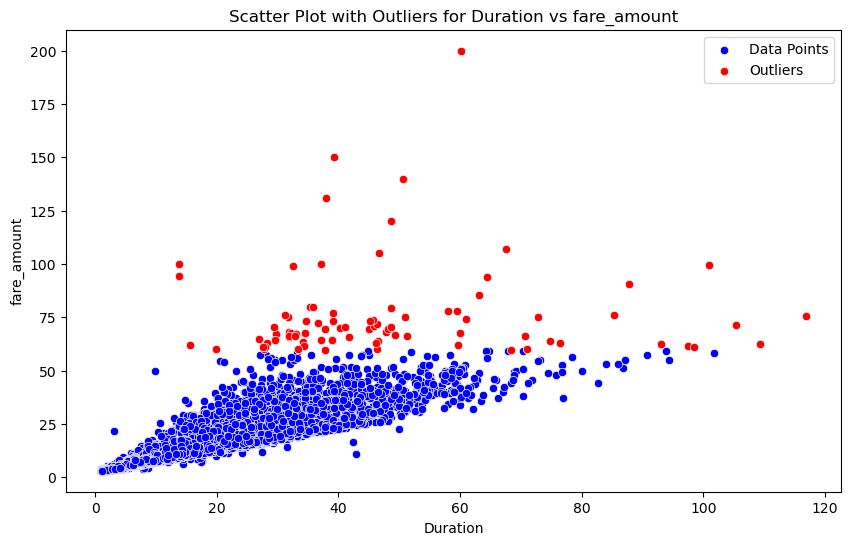

In [41]:
plot_outliers_iqr(df, 'Duration', 'fare_amount')

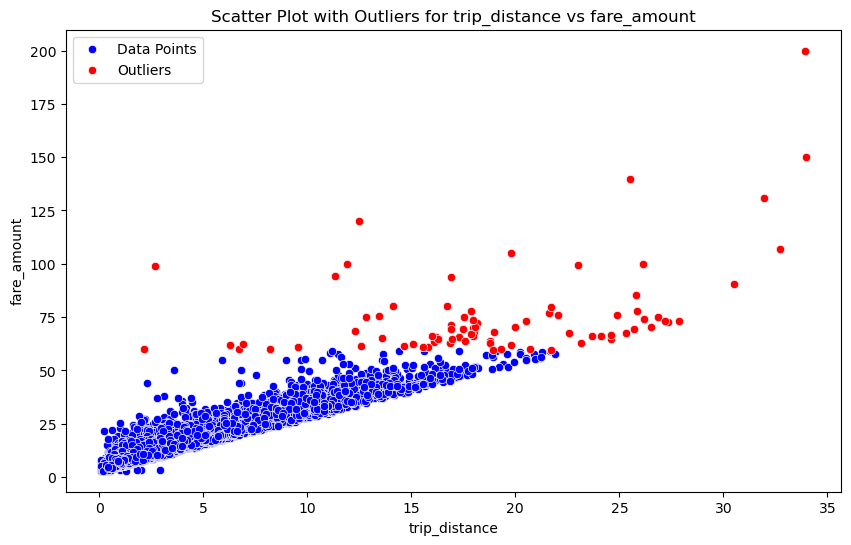

In [42]:
plot_outliers_iqr(df, 'trip_distance', 'fare_amount')

In [43]:
def outlier_remove(df, col, n):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - n * IQR
    upper_bound = Q3 + n * IQR
    
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [44]:
df = outlier_remove(df, 'fare_amount', 6)

In [45]:
df[['fare_amount', 'trip_distance', 'Duration']].describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,21834.000,11.809,8.097,3.000,6.500,9.500,14.000,59.000
trip_distance,21834.000,2.547,2.674,0.100,1.000,1.600,2.900,21.900
Duration,21834.000,13.591,9.846,1.017,6.683,11.017,17.683,101.667


### Feature engineering

Une fois mis en pratique, le modèle ne pourra estimer la durée d'un déplacement qu'après sa réalisation effective, ce qui restreint la capacité de former un modèle axé sur cette caractéristique particulière. Cependant, je peux tirer parti des statistiques des déplacements existantes pour extrapoler vers ceux qui ne sont pas encore disponibles.

Au cours de cette phase, je vais instaurer une nouvelle colonne intitulée "distance_moyenne" afin de consigner la distance moyenne pour chaque ensemble de trajets partageant des points de départ et d'arrivée similaires.

In [46]:
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

In [47]:
grouped_df = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped_dict_train_distance = grouped_df['trip_distance'].to_dict()
df['mean_distance'] = df['pickup_dropoff'].map(grouped_dict_train_distance)

grouped_df = df.groupby('pickup_dropoff').mean(numeric_only=True)[['Duration']]
grouped_dict_train_duration = grouped_df['Duration'].to_dict()
df['mean_duration'] = df['pickup_dropoff'].map(grouped_dict_train_duration)

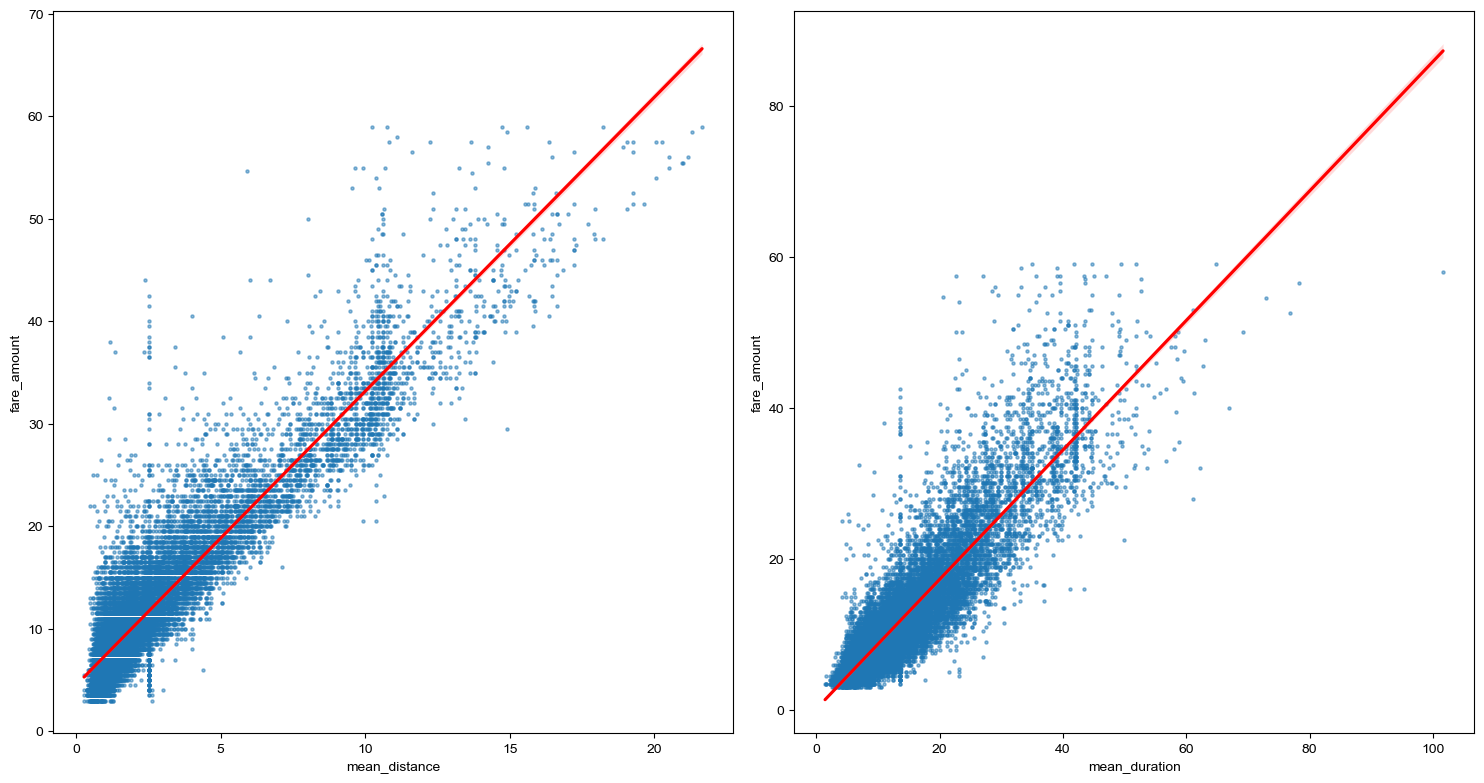

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8)) 
sns.set(style='whitegrid')

sns.regplot(ax=axes[0], x=df.mean_distance, y=df.fare_amount,
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})

sns.regplot(ax=axes[1], x=df.mean_duration, y=df.fare_amount,
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})

plt.tight_layout()
plt.show()

In [49]:
df['hour'] = df.tpep_pickup_datetime.dt.hour

In [50]:
df['day'] = df.tpep_pickup_datetime.dt.weekday

In [51]:
X = df.drop(columns=['fare_amount'])
y = df[['fare_amount']]
X.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,Duration,pickup_dropoff,mean_distance,mean_duration,hour,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.340,1,N,100,231,...,2.760,0.000,0.300,16.560,14.067,100 231,3.522,22.847,8,5
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.800,1,N,186,43,...,4.000,0.000,0.300,20.800,26.500,186 43,3.109,24.470,14,1
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.000,1,N,262,236,...,1.450,0.000,0.300,8.750,7.200,262 236,0.881,7.250,7,4
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.700,1,N,188,97,...,6.390,0.000,0.300,27.690,30.250,188 97,3.700,30.250,13,6
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.370,1,N,4,112,...,0.000,0.000,0.300,17.800,16.717,4 112,4.435,14.617,23,5


In [52]:
X1 = X[['passenger_count', 'RatecodeID', 'payment_type', 'mta_tax', 'mean_duration', 'mean_distance', 'VendorID', 'day', 'hour']]

In [53]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21834 entries, 0 to 22698
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  21834 non-null  int64  
 1   RatecodeID       21834 non-null  int64  
 2   payment_type     21834 non-null  int64  
 3   mta_tax          21834 non-null  float64
 4   mean_duration    21834 non-null  float64
 5   mean_distance    21834 non-null  float64
 6   VendorID         21834 non-null  int64  
 7   day              21834 non-null  int32  
 8   hour             21834 non-null  int32  
dtypes: float64(3), int32(2), int64(4)
memory usage: 1.5 MB


In [54]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif, SelectKBest

y_column = y.iloc[:, 0]
y_array = y_column.ravel()

numeric_columns = X1.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X1[numeric_columns]

k_best = SelectKBest(f_classif, k=2)
X_anova = k_best.fit_transform(X_numeric, y_array)

selected_feature_indices = k_best.get_support(indices=True)
selected_features = X_numeric.columns[selected_feature_indices]
print("Selected Features:", selected_features)

Selected Features: Index(['mean_duration', 'mean_distance'], dtype='object')


C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


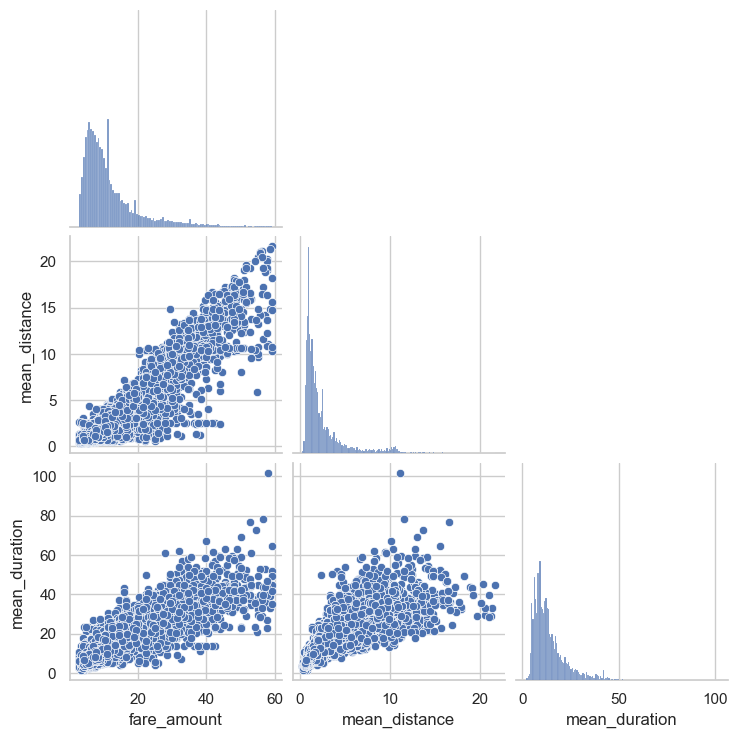

In [55]:
sns.pairplot(df[['fare_amount','mean_distance', 'mean_duration']], corner = True)
plt.show()

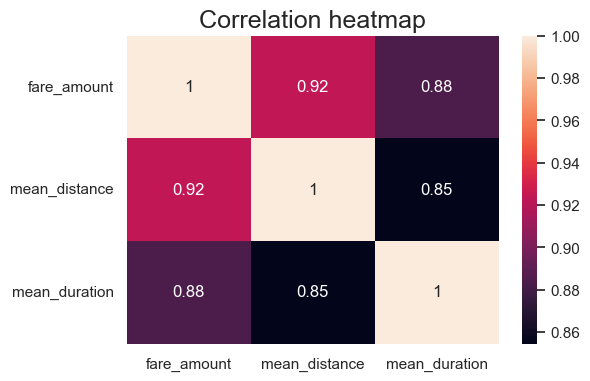

In [56]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['fare_amount','mean_distance', 'mean_duration']].corr(method='pearson'), annot=True)
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

Les variables `mean_duration` et `mean_distance` sont toutes deux fortement corrélées avec la variable cible `fare_amount`. Elles sont également corrélées entre elles, avec une corrélation de Pearson de 0,86.

Les variables prédictives fortement corrélées peuvent être néfastes pour les modèles de régression linéaire lorsque l'on souhaite pouvoir tirer des conclusions statistiques sur les données à partir du modèle. Cependant, les variables prédicteurs corrélées peuvent toujours être utilisées pour créer un prédicteur précis si la prédiction elle-même est plus importante que l'utilisation du modèle comme outil d'apprentissage de données.

Ce modèle prédit `fare_amount`, qui sera utilisé comme variable prédictive dans les modèles d'apprentissage automatique. Par conséquent, je vais essayer de modéliser avec les deux variables même si elles sont corrélées.

In [57]:
unique_values = df['PULocationID'].unique()
train_values, test_values = train_test_split(unique_values, test_size=0.2, random_state=0)

train_data = df[df['PULocationID'].isin(train_values)]
test_data = df[df['PULocationID'].isin(test_values)]

y_train = train_data[['fare_amount']]
y_test = test_data[['fare_amount']]

In [58]:
train_data = train_data.copy()
grouped_train = train_data.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped_dict_train_distance = grouped_train['trip_distance'].to_dict()
train_data.loc[:, 'mean_distance'] = train_data['pickup_dropoff'].map(grouped_dict_train_distance)

grouped_train_duration = train_data.groupby('pickup_dropoff').mean(numeric_only=True)[['Duration']]
grouped_dict_train_duration = grouped_train_duration['Duration'].to_dict()
train_data.loc[:, 'mean_duration'] = train_data['pickup_dropoff'].map(grouped_dict_train_duration)

In [59]:
test_data = test_data.copy()
grouped_test_distance = test_data.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped_dict_test_distance = grouped_test_distance['trip_distance'].to_dict()
test_data.loc[:, 'mean_distance'] = test_data['pickup_dropoff'].map(grouped_dict_test_distance)

grouped_test_duration = test_data.groupby('pickup_dropoff').mean(numeric_only=True)[['Duration']]
grouped_dict_test_duration = grouped_test_duration['Duration'].to_dict()
test_data.loc[:, 'mean_duration'] = test_data['pickup_dropoff'].map(grouped_dict_test_duration)

In [60]:
train_data.shape

(16585, 24)

In [61]:
test_data.shape

(5249, 24)

### Isoler les variables de modélisation

In [62]:
train_data, test_data = train_data[X_numeric.columns[selected_feature_indices]], test_data[X_numeric.columns[selected_feature_indices]]

In [63]:
train_data.head()

,mean_duration,mean_distance
0,22.847,3.522
1,24.470,3.109
2,7.250,0.881
3,30.250,3.700
4,14.617,4.435


In [64]:
test_data.head()

,mean_duration,mean_distance
7,26.438,4.022
8,7.873,1.019
18,4.856,0.698
22,5.083,0.708
24,4.787,0.619


In [65]:
from sklearn.linear_model import LinearRegression
y_train1 = y_train.iloc[:, 0].ravel()
lr = LinearRegression()
lr.fit(train_data, y_train1)

LinearRegression()

In [66]:
r_sq = lr.score(train_data, y_train1)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(train_data)
print('R^2:', r2_score(y_train1, y_pred_train))
print('MAE:', mean_absolute_error(y_train1, y_pred_train))
print('MSE:', mean_squared_error(y_train1, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train1, y_pred_train)))

Coefficient of determination: 0.890599589210122
R^2: 0.890599589210122
MAE: 1.8292282721508597
MSE: 7.711901339217647
RMSE: 2.777031029574147


In [67]:
y_test1 = y_test.iloc[:, 0].ravel()
r_sq_test = lr.score(test_data, y_test1)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(test_data)
print('R^2:', r2_score(y_test1, y_pred_test))
print('MAE:', mean_absolute_error(y_test1,y_pred_test))
print('MSE:', mean_squared_error(y_test1, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test1, y_pred_test)))

Coefficient of determination: 0.8612893757762217
R^2: 0.8612893757762217
MAE: 1.7998729249938288
MSE: 6.787488257636218
RMSE: 2.6052808404539074


La performance du modèle est élevée à la fois sur les ensembles d'entrainement et de test, ce qui suggère qu'il n'y a pas de biais dans le modèle et qu'il n'est pas surajusté.

Pour les données de test, un R2 de 0,86 signifie que 86 % de la variance de la variable `fare_amount` est décrite par le modèle.

In [68]:
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
7,16.000,19.021,-3.021
8,9.000,6.904,2.096
18,5.000,5.257,-0.257
22,5.500,5.353,0.147
24,5.500,5.080,0.420


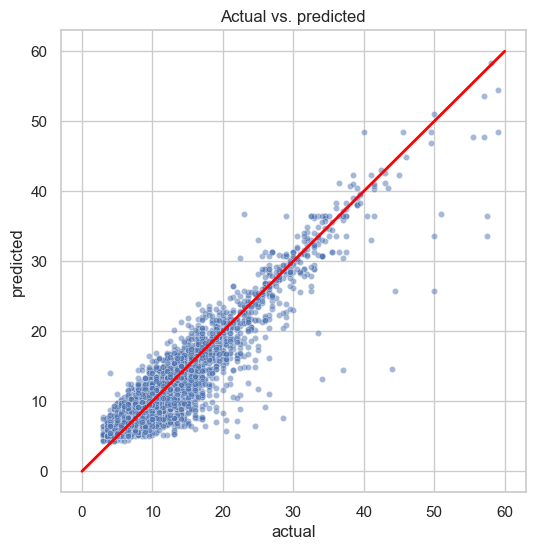

In [69]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

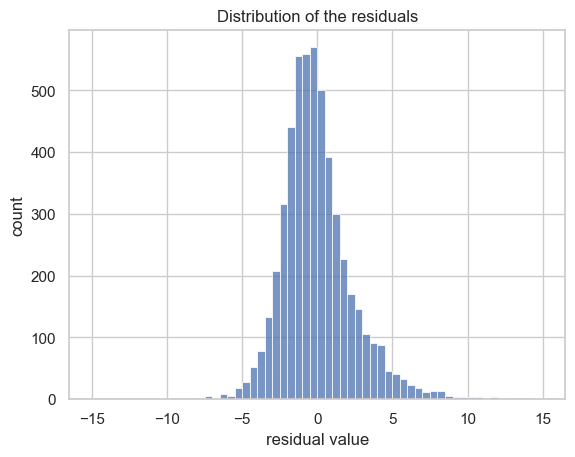

In [70]:
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [71]:
results['residual'].mean()

0.025771906051981944

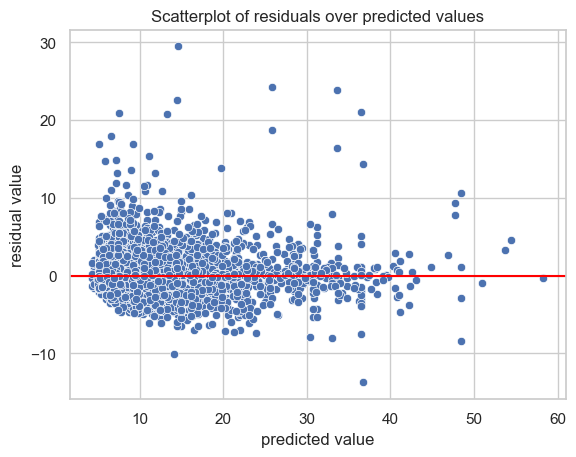

In [72]:
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

In [73]:
coefficients = pd.DataFrame(lr.coef_.reshape(1, -1), columns=train_data.columns)
coefficients

,mean_duration,mean_distance
0,0.340,1.935


In [74]:
print(train_data['mean_distance'].std())

2.7301601581342276


Pour chaque 2.73 miles parcourus, le tarif augmente en moyenne de 1.935$.

### Vérifier les performances sur l'ensemble des données

In [75]:
y_preds_full = lr.predict(df[X_numeric.columns[selected_feature_indices]])

In [82]:
y = df[['fare_amount']]
print('R^2:', r2_score(y, y_preds_full))
print('MAE:', mean_absolute_error(y, y_preds_full))
print('MSE:', mean_squared_error(y, y_preds_full))
print('RMSE:',np.sqrt(mean_squared_error(y, y_preds_full)))

R^2: 0.8857492385164898
MAE: 1.8221711036417798
MSE: 7.489667929616981
RMSE: 2.736725768069753


### Enregistrer les prédictions finales avec les colonnes `mean_duration` et `mean_distance`.

In [83]:
preds_means = df[['mean_duration', 'mean_distance']].copy()
preds_means['predicted_fare'] = y_preds_full

preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847,3.522,16.832
1,24.470,3.109,16.585
2,7.250,0.881,6.425
3,30.250,3.700,19.692
4,14.617,4.435,15.805
